In [1]:
import matplotlib.pyplot as plt
import pandas as pd
#!pip install seaborn
import seaborn as sns

   year  documents  code shared  code location
0  2019       1168          127            108
1  2018       1242          133            121
2  2020       1347          172            150
3  2021       1447          224            208
4  2022       1262          245            228
5  2023       1148          211            192
   year  code shared  code location
0  2019     0.108733       0.092466
1  2018     0.107085       0.097424
2  2020     0.127691       0.111359
3  2021     0.154803       0.143746
4  2022     0.194136       0.180666
5  2023     0.183798       0.167247


year  documents  code shared  code location
year           1.000000  -0.041776     0.867303       0.846634
documents     -0.041776   1.000000     0.348465       0.353812
code shared    0.867303   0.348465     1.000000       0.997612
code location  0.846634   0.353812     0.997612       1.000000

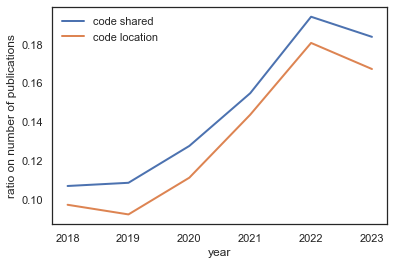

In [2]:
comparator = pd.read_csv('comparator-plos2023-codegenerated-filtered.csv',delimiter=';')
#print(comparator.head(3))

comp = pd.DataFrame()
comp['year'] = comparator['Publication_Year'].unique() # reduce row number to different years
# count "yes" in specified column under certain condition in other column:
comp['documents'] = [
    (len(comparator[(comparator['Publication_Year']==2019)])), 
    (len(comparator[(comparator['Publication_Year']==2018)])), 
    (len(comparator[(comparator['Publication_Year']==2020)])), 
    (len(comparator[(comparator['Publication_Year']==2021)])), 
    (len(comparator[(comparator['Publication_Year']==2022)])), 
    (len(comparator[(comparator['Publication_Year']==2023)]))
]
comp['code shared'] = [
    (len(comparator[(comparator['Publication_Year']==2019) & (comparator['Code_Shared']=='Yes')]) ), 
    (len(comparator[(comparator['Publication_Year']==2018) & (comparator['Code_Shared']=='Yes')]) ), 
    (len(comparator[(comparator['Publication_Year']==2020) & (comparator['Code_Shared']=='Yes')]) ), 
    (len(comparator[(comparator['Publication_Year']==2021) & (comparator['Code_Shared']=='Yes')]) ), 
    (len(comparator[(comparator['Publication_Year']==2022) & (comparator['Code_Shared']=='Yes')]) ), 
    (len(comparator[(comparator['Publication_Year']==2023) & (comparator['Code_Shared']=='Yes')]) )
]
comp['code location'] = [
    (len(comparator[(comparator['Publication_Year']==2019) & (comparator['Code_Location']==('Online'))]) ), # + len(comparator[(comparator['Publication_Year']==2019) & (comparator['Code_Location']==('Supplementary Information'))])), 
    (len(comparator[(comparator['Publication_Year']==2018) & (comparator['Code_Location']==('Online'))]) ), # + len(comparator[(comparator['Publication_Year']==2018) & (comparator['Code_Location']==('Supplementary Information'))])), 
    (len(comparator[(comparator['Publication_Year']==2020) & (comparator['Code_Location']==('Online'))]) ), # + len(comparator[(comparator['Publication_Year']==2020) & (comparator['Code_Location']==('Supplementary Information'))])), 
    (len(comparator[(comparator['Publication_Year']==2021) & (comparator['Code_Location']==('Online'))]) ), # + len(comparator[(comparator['Publication_Year']==2021) & (comparator['Code_Location']==('Supplementary Information'))])), 
    (len(comparator[(comparator['Publication_Year']==2022) & (comparator['Code_Location']==('Online'))]) ), # + len(comparator[(comparator['Publication_Year']==2022) & (comparator['Code_Location']==('Supplementary Information'))])), 
    (len(comparator[(comparator['Publication_Year']==2023) & (comparator['Code_Location']==('Online'))]) ) # + len(comparator[(comparator['Publication_Year']==2023) & (comparator['Code_Location']==('Supplementary Information'))]))
] # optional sum of Code indication "Online" and "Supplementary Information"
print(comp)

# ratio of shared and location to all documents that have generated code:

dcomp = pd.DataFrame()
date = dcomp['year'] = comp['year']
shared = dcomp['code shared'] = comp['code shared']/comp['documents']# * 100 # for percentage
location = dcomp['code location'] =  comp['code location']/comp['documents']# * 100 # for percentage
print(dcomp)

## plot data:

sns.set(rc={'figure.figsize':(8,4)})
sns.set_theme(style="white")
sns.lineplot(data = dcomp, x = date, y = shared, linewidth = 2, label='code shared')
sns.lineplot(data = dcomp, x = date, y = location, linewidth = 2, label='code location')
plt.ylabel('ratio on number of publications')
leg = plt.legend()
leg.get_frame().set_linewidth(0.0)
#plt.savefig('comparator-timeseries2.pdf')

## correlation articles & documents over timeline

datasumcomp = comp[['year', 'documents', 'code shared', 'code location']]
datasumcomp.corr()

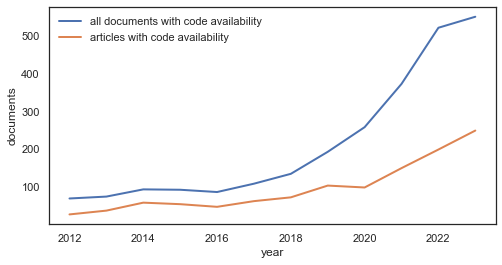

In [3]:
## scopus summary on "code available":

data = pd.read_csv('scopus-counts.csv', delimiter=';')
date = data['year']
documents = data['documents']
articles = data['articles']

## plot data:

sns.set(rc={'figure.figsize':(8,4)})
sns.set_theme(style="white")
sns.lineplot(data = data, x = date, y = documents, linewidth = 2, label='all documents with code availability')
sns.lineplot(data = data, x = date, y = articles, linewidth = 2, label='articles with code availability')
leg = plt.legend()
leg.get_frame().set_linewidth(0.0)
#plt.savefig('scopus-timeseries1.pdf')

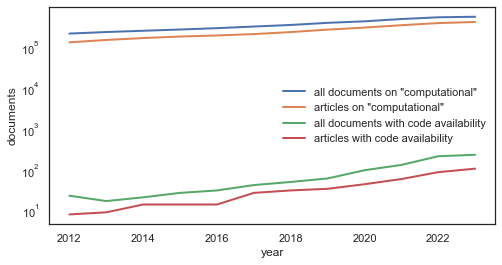

In [4]:
## scopus summary on "computational":

dataA = pd.read_csv('scopus-computational.csv', delimiter=';')
dateA = dataA['year']
documentsComp = dataA['documents-computational']
articlesComp = dataA['articles-computational']
documentsCompCode = dataA['documents-code-computational']
articlesCompCode = dataA['articles-code-computational']

## plot data:

sns.set(rc={'figure.figsize':(8,4)})
sns.set_theme(style="white")
sns.lineplot(data = dataA, x = dateA, y = documentsComp, linewidth = 2, label='all documents on "computational"')
sns.lineplot(data = dataA, x = dateA, y = articlesComp, linewidth = 2, label='articles on "computational"')
sns.lineplot(data = dataA, x = dateA, y = documentsCompCode, linewidth = 2, label='all documents with code availability')
sns.lineplot(data = dataA, x = dateA, y = articlesCompCode, linewidth = 2, label='articles with code availability')
leg = plt.legend()
leg.get_frame().set_linewidth(0.0)
plt.yscale('log')
plt.ylabel('documents')
plt.savefig('scopus-timeseries3.pdf')

## correlation articles & documents over timeline

datasumscopus = dataA[['year','documents-computational','articles-computational','documents-code-computational','articles-code-computational']] 
datasumscopus.corr()
scopuscorr = pd.DataFrame()
scopuscorr = datasumscopus.corr()
#print(scopuscorr.to_latex(index=True))


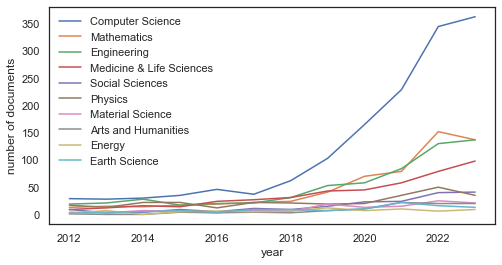

In [7]:
# new combined column:
data['Medicine & Life Sciences'] = data['Medicine'] + data['Life Sciences']

#create new dataframe with disciplines only
disciplines = pd.DataFrame()
disciplines = data[['year', 'Computer Science','Mathematics','Engineering','Medicine & Life Sciences','Social Sciences','Physics','Material Science','Arts and Humanities','Energy','Earth Science']]

## plot data:

## define multicolumn plot: 
disciplinesM = disciplines.melt('year', var_name='cols', value_name='values') 

sns.set(rc={'figure.figsize':(8,4)})
sns.set_theme(style="white")
sns.set_style()
ax = sns.lineplot(x='year', y="values",  hue='cols', data = disciplinesM)
plt.ylabel('number of documents')
leg = plt.legend()
leg.get_frame().set_linewidth(0.0)
fig = ax.get_figure()
#fig.savefig('scopus-disciplines-docnumber.pdf')

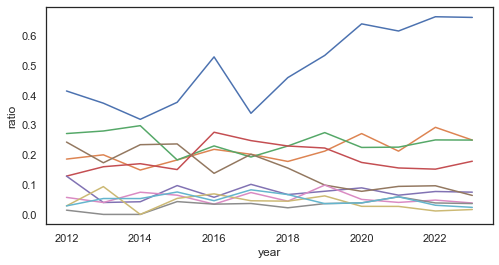

In [8]:
# ratio for disciplines:
ratio = pd.DataFrame()
ratio['year'] = data['year']
ratio['Computer Science'] = data['Computer Science']/data['documents']
ratio['Mathematics'] = data['Mathematics']/data['documents']
ratio['Engineering'] = data['Engineering']/data['documents']
ratio['Medicine & Life Sciences'] = data['Medicine & Life Sciences']/data['documents']
ratio['Social Sciences'] = data['Social Sciences']/data['documents']
ratio['Physics'] = data['Physics']/data['documents']
ratio['Material Science'] = data['Material Science']/data['documents']
ratio['Arts & Humanities'] = data['Arts and Humanities']/data['documents']
ratio['Energy'] = data['Energy']/data['documents']
ratio['Earth Science'] = data['Earth Science']/data['documents']

## plot scopus disciplines - ratios:

## define multicolumn plot: 
ratioM = ratio.melt('year', var_name='cols', value_name='values') 
#print(ratioM.head(3))

sns.set(rc={'figure.figsize':(8,4)})
sns.set_theme(style="white")
sns.set_style()
plt.ylabel('ratio')
bx = sns.lineplot(x='year', y="values",  hue='cols', data = ratioM)
bx.legend_.remove()
fig = bx.get_figure()
#fig.savefig('scopus-disciplines-ratio.pdf')

year   allhits  freefulltext  associateddata    FFT+AD
year            1.000000  0.987393      0.975246        0.010543  0.008793
allhits         0.987393  1.000000      0.996098        0.012543  0.021745
freefulltext    0.975246  0.996098      1.000000       -0.011420  0.000015
associateddata  0.010543  0.012543     -0.011420        1.000000  0.985379
FFT+AD          0.008793  0.021745      0.000015        0.985379  1.000000

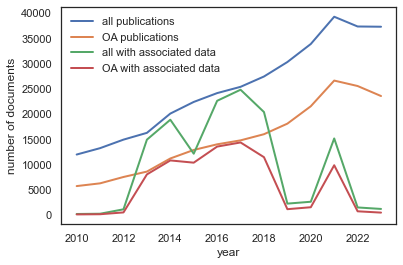

In [2]:
## pubmed overview using the search term "computational"

pmcdat = pd.read_csv("pubmed-computational.csv",delimiter=";")
#print(pmcdat.head(7))
years = pmcdat["year"]
allhits = pmcdat["allhits"]
FFT = pmcdat["freefulltext"]
AD = pmcdat["associateddata"]
FFTAD = pmcdat["FFT+AD"]

## plot data:

sns.set(rc={'figure.figsize':(8,4)})
sns.set_theme(style="white")
sns.lineplot(data = pmcdat, x = years, y = allhits, linewidth = 2, label='all publications')
sns.lineplot(data = pmcdat, x = years, y = FFT, linewidth = 2, label='OA publications')
sns.lineplot(data = pmcdat, x = years, y = AD, linewidth = 2, label='all with associated data')
sns.lineplot(data = pmcdat, x = years, y = FFTAD, linewidth = 2, label='OA with associated data')
plt.ylabel('number of documents')
leg = plt.legend()
leg.get_frame().set_linewidth(0.0)
#plt.savefig('pmc-timeseries1.pdf')

## correlation of all, free full text publications with and without associated data over time

datasumpubmed = pmcdat
datasumpubmed.corr()

year   allhits  freefulltext  associateddata    FFT+AD
year            1.000000  0.967043      0.957831       -0.051860 -0.027558
allhits         0.967043  1.000000      0.995970       -0.102137 -0.065909
freefulltext    0.957831  0.995970      1.000000       -0.142787 -0.109118
associateddata -0.051860 -0.102137     -0.142787        1.000000  0.980964
FFT+AD         -0.027558 -0.065909     -0.109118        0.980964  1.000000

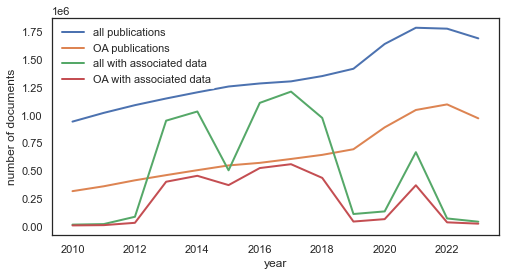

In [4]:
## pubmed using no search term

pmcdat2 = pd.read_csv("pubmed-all.csv",delimiter=";")
#print(pmcdat.head(7))
years2 = pmcdat2["year"]
allhits2 = pmcdat2["allhits"]
FFT2 = pmcdat2["freefulltext"]
AD2 = pmcdat2["associateddata"]
FFTAD2 = pmcdat2["FFT+AD"]

## plot data:

sns.set(rc={'figure.figsize':(8,4)})
sns.set_theme(style="white")
sns.lineplot(data = pmcdat2, x = years2, y = allhits2, linewidth = 2, label='all publications')
sns.lineplot(data = pmcdat2, x = years2, y = FFT2, linewidth = 2, label='OA publications')
sns.lineplot(data = pmcdat2, x = years2, y = AD2, linewidth = 2, label='all with associated data')
sns.lineplot(data = pmcdat2, x = years2, y = FFTAD2, linewidth = 2, label='OA with associated data')
plt.ylabel('number of documents')
leg = plt.legend()
leg.get_frame().set_linewidth(0.0)
#plt.savefig('pmc-timeseries2.pdf')

## correlation of all, free full text publications with and without associated data over time

datasumpubmed = pmcdat2
datasumpubmed.corr()

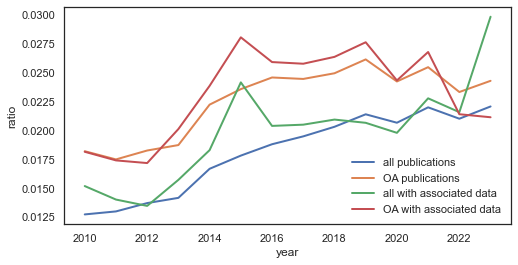

In [11]:
## ratio from pubmed results using the search term "computational" versus no restriction

pmcdatratio = pmcdat/pmcdat2
#print(pmcdatratio)

## plot data:

sns.set(rc={'figure.figsize':(8,4)})
sns.set_theme(style="white")
sns.lineplot(data = pmcdatratio, x = years, y = allhits/allhits2, linewidth = 2, label='all publications')
sns.lineplot(data = pmcdatratio, x = years, y = FFT/FFT2, linewidth = 2, label='OA publications')
sns.lineplot(data = pmcdatratio, x = years, y = AD/AD2, linewidth = 2, label='all with associated data')
sns.lineplot(data = pmcdatratio, x = years, y = FFTAD/FFTAD2, linewidth = 2, label='OA with associated data')
plt.ylabel('ratio')
leg = plt.legend()
leg.get_frame().set_linewidth(0.0)
#plt.savefig('pmc-ratio.pdf')

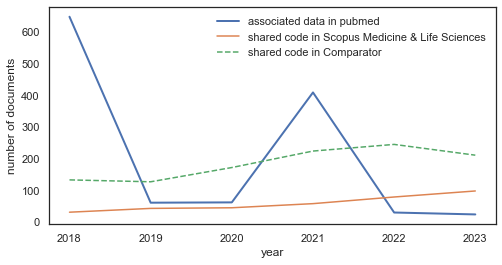

In [25]:
## comparison of all sources for biomedical data

compsum = comp[['year', 'code shared']]
datashort = data.loc[data['year'].isin([2018,2019,2020,2021,2022,2023])]
scopusbiomed = datashort[['year','Medicine & Life Sciences']]
pmcshort = pmcdat.loc[pmcdat['year'].isin([2018,2019,2020,2021,2022,2023])]

sns.set(rc={'figure.figsize':(8,4)})
sns.set_theme(style="white")
sns.set_style()
sns.lineplot(data = pmcshort, x = 'year', y = AD, linewidth = 2, label="associated data in pubmed")
sns.lineplot(x='year', y="Medicine & Life Sciences", data = scopusbiomed, label = "shared code in Scopus Medicine & Life Sciences")
sns.lineplot(x='year', y="code shared", linestyle = 'dashed', data = compsum, label = "shared code in Comparator")
plt.ylabel('number of documents')
leg = plt.legend()
leg.get_frame().set_linewidth(0.0)
fig = ax.get_figure()
#fig.savefig('biomed-docnumber.pdf')